In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from uncertainties import unumpy as unp
import uncertainties
import seaborn as sb
import matplotlib.cm as cm
import scipy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import datetime

from scipy.stats.mstats import gmean

In [2]:
raw_data = pd.read_excel('data/RawData.xlsx')
raw_data = raw_data[~raw_data.units.str.contains('trap')]

raw_data.loc[raw_data['sub-class']=='Acari','aggregated taxon'] = 'Acari'
raw_data.loc[raw_data['sub-class']=='Collembola','aggregated taxon'] = 'Collembola'
raw_data.loc[raw_data['super-family']=='Isoptera','aggregated taxon'] = 'Isoptera'
raw_data.loc[raw_data['family']=='Formicidae','aggregated taxon'] = 'Formicidae'
raw_data.loc[raw_data['aggregated taxon'].isna(),'aggregated taxon'] = 'Other'

In [3]:
All_dates = raw_data.date #unique dates per unique site
U_dates = raw_data.groupby(['site']).date.unique() #unique dates per unique site
#U_dates = raw_data([]).groupby(['site']).date.unique() #unique dates per unique site

U_datesR = U_dates.ravel()
print('Everythin: %d' %len(U_datesR))

U_dates_mass = raw_data[raw_data.units.str.startswith('mg')].groupby(['site']).date.unique().ravel() #unique dates per unique site
print('Mass: %d' %len(U_dates_mass))

U_dates_ind = raw_data[raw_data.units.str.startswith('ind')].groupby(['site']).date.unique().ravel() #unique dates per unique site
print('Ind: %d' %len(U_dates_ind))

U_dates_Acari = raw_data[raw_data['aggregated taxon']=='Acari'].groupby(['site']).date.unique().ravel() 
print('Acari: %d' %len(U_dates_Acari))

U_dates_Collembola = raw_data[raw_data['aggregated taxon']=='Collembola'].groupby(['site']).date.unique().ravel() 
print('Collembola: %d' %len(U_dates_Collembola))

U_dates_Isoptera = raw_data[raw_data['aggregated taxon']=='Isoptera'].groupby(['site']).date.unique().ravel() 
print('Isoptera: %d' %len(U_dates_Isoptera))

U_dates_Formicidae = raw_data[raw_data['aggregated taxon']=='Formicidae'].groupby(['site']).date.unique().ravel()
print('Formicidae: %d' %len(U_dates_Formicidae))

U_dates_Other = raw_data[raw_data['aggregated taxon']=='Other'].groupby(['site']).date.unique().ravel()
print('Other: %d' %len(U_dates_Other))

#U_datesR
#U_datesR.reshape((-1,))
#U_datesF = [val for sub_arr in U_dates for val in sub_arr] #unique dates per unique site, flattened completely
#len(U_datesF)

Everythin: 610
Mass: 393
Ind: 442
Acari: 218
Collembola: 193
Isoptera: 142
Formicidae: 150
Other: 348


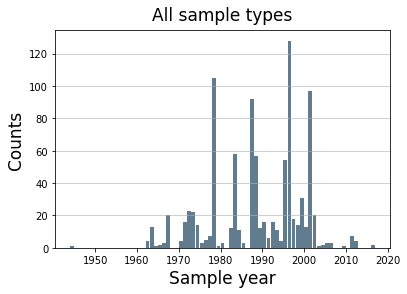

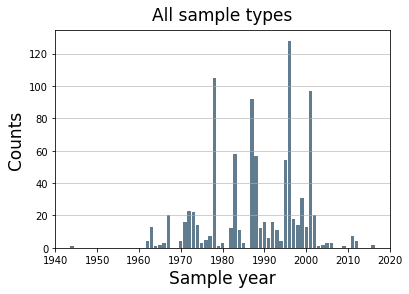

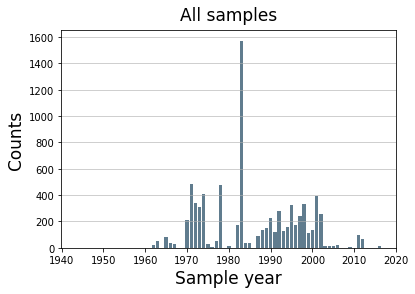

In [5]:
def getYear(x): #works element-wise
    if isinstance(x, datetime.datetime) :
        return x.year
    elif isinstance(x, int):
        return x
    elif isinstance(x, str):
        x = x.replace(" ","")
        if len(x)<=10 and '/' in x :
            d1 = datetime.datetime.strptime(x, '%d/%m/%Y')
            return d1.year
        elif '-' in x and '/' in x :
            D = x.split('-',2)
            d1 = datetime.datetime.strptime(D[0], '%d/%m/%Y')
            d2 = datetime.datetime.strptime(D[1], '%d/%m/%Y')
            d = d1+(d2-d1)/2
            return d.year
        elif '-' in x :
            D = x.split('-',2)
            d1 = datetime.datetime.strptime(D[0], '%Y')
            d2 = datetime.datetime.strptime(D[1], '%Y')
            d = d1+(d2-d1)/2
            return d.year
        else:
            return np.nan
    else: 
        return np.nan    
    

def dateArrMean(dateArr): #mean date from a date array
    mean = (np.array(dateArr, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))
    return mean

def getYears_Arr_av(x): #uses getYear for an entire pd.Series, using an average date per each site
    xF = [val for sub_arr in x for val in sub_arr] #flatten x completely    
    Years = [0] * len(xF)

    for ii in list(range(len(xF))):
        Years[ii] = getYear(xF[ii])
        
    Years_fixed = np.array(Years)
    Years_fixed = Years_fixed[Years_fixed < 2022]
    Years_fixed = Years_fixed[Years_fixed > 0]
    
    return Years_fixed

def getYears_Arr(x): #uses getYear for an entire pd.Series flattening the array
    xF = [val for sub_arr in x for val in sub_arr] #flatten x completely    
    Years = [0] * len(xF)

    for ii in list(range(len(xF))):
        Years[ii] = getYear(xF[ii])
        
    Years_fixed = np.array(Years)
    Years_fixed = Years_fixed[Years_fixed < 2022]
    Years_fixed = Years_fixed[Years_fixed > 0]
    
    return Years_fixed


def PlotHist(x, title):
    #x.plot.hist(grid=True, bins=20, rwidth=0.9,
    #               color='#607c8e')
    
    fig, ax = plt.subplots(figsize = (6,4))
    
    YearsArr = getYears_Arr(x)
#    Nbins = np.max(YearsArr) - np.min(YearsArr)
    bins = range(np.min(YearsArr),np.max(YearsArr)+2)
    plt.hist(YearsArr, bins=bins,  rwidth=0.9,color='#607c8e')
#    ax.set_xlim(np.min(YearsArr),np.max(YearsArr))
    plt.title(title, size = 17, pad = 10)
    plt.xlabel('Sample year', size = 17)
    plt.ylabel('Counts', size = 17)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
def PlotBar(x, title):
    #x.plot.hist(grid=True, bins=20, rwidth=0.9,
    #               color='#607c8e')
    
    fig, ax = plt.subplots(figsize = (6,4))
    
    YearsArr = getYears_Arr(x)
    labels, counts = np.unique(YearsArr, return_counts=True)
    plt.bar(labels, counts, align='center',color='#607c8e')
    plt.title(title, size = 17, pad = 10)
    plt.xlabel('Sample year', size = 17)
    plt.ylabel('Counts', size = 17)
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    


PlotHist(U_dates, 'All sample types')      
PlotBar(U_dates, 'All sample types')  #this one is better, since it's centered on the years. 


Years = [0] * len(All_dates)

for ii in list(range(len(All_dates))):
    Years[ii] = getYear(All_dates[ii])
        
    Years_fixed = np.array(Years)
    Years_fixed = Years_fixed[Years_fixed < 2022]
    Years_fixed = Years_fixed[Years_fixed > 0]

fig, ax = plt.subplots(figsize = (6,4))
    
labels, counts = np.unique(Years_fixed, return_counts=True)
plt.bar(labels, counts, align='center',color='#607c8e')
plt.title('All samples', size = 17, pad = 10)
plt.xlabel('Sample year', size = 17)
plt.ylabel('Counts', size = 17)
plt.grid(axis='y', alpha=0.75)
plt.show()

#PlotBar(All_dates.ravel(), 'All samples dates')

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


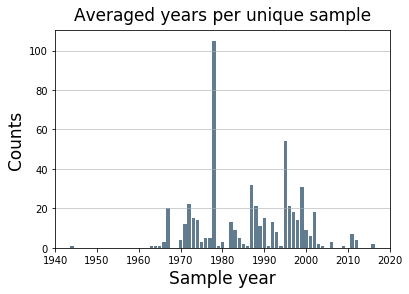

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


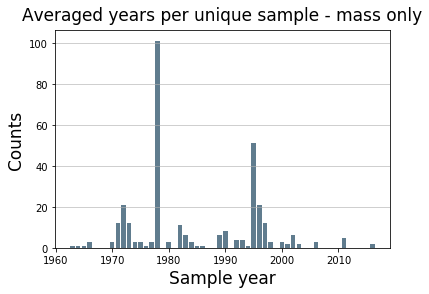

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


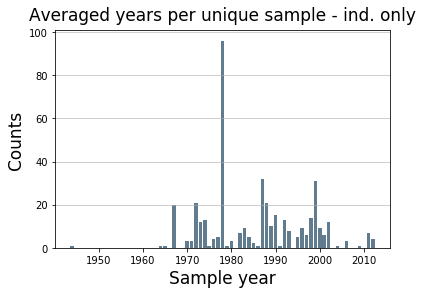

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


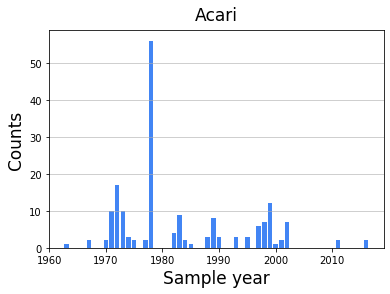

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


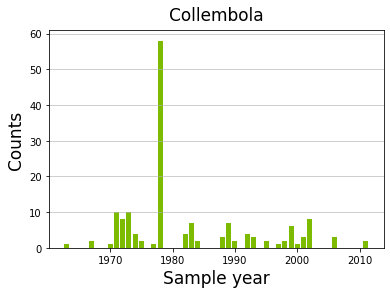

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


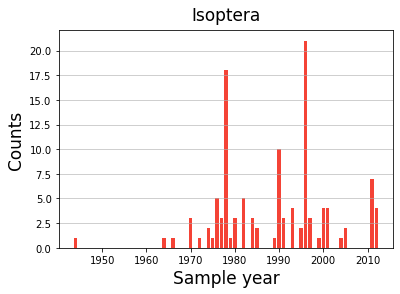

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


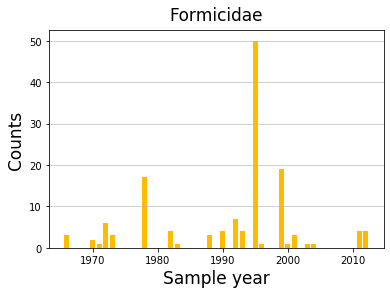

/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuvalr/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


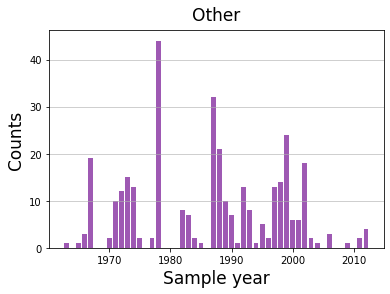

In [6]:
def getYears_Arr_av(x): #uses getYear for an entire pd.Series, averaging over the subarrays
    Years = [0] * len(x) #final years

    for ii in list(range(len(x))):
        tmpYears = [0] * len(x[ii])
        
        for jj in list(range(len(x[ii]))):
            tmpYears[jj] = getYear(x[ii][jj])
        
        tmpYears_fixed = np.array(tmpYears)
        tmpYears_fixed = tmpYears_fixed[tmpYears_fixed>0]
        tmpYears_fixed = tmpYears_fixed[tmpYears_fixed<2022]
        Years[ii] = np.round(np.mean(tmpYears_fixed))
    
        
#    Years_fixed = np.array(Years)
#    Years_fixed = Years_fixed[Years_fixed < 2022]
#    Years_fixed = Years_fixed[Years_fixed > 0]
    
    return Years


def PlotBar_av(x,title,Color='#607c8e'):
    fig, ax = plt.subplots(figsize = (6,4))
    
    YearsArr = getYears_Arr_av(x)
    labels, counts = np.unique(YearsArr, return_counts=True)
    plt.bar(labels, counts, align='center',color=Color)
    plt.title(title, size = 17, pad = 10)
    plt.xlabel('Sample year', size = 17)
    plt.ylabel('Counts', size = 17)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('results/time_'+ title + '.pdf',dpi=600,bbox_inches = "tight") #Save as pdf
    plt.show()
    

    
PlotBar_av(U_datesR,'Averaged years per unique sample')
PlotBar_av(U_dates_mass,'Averaged years per unique sample - mass only')
PlotBar_av(U_dates_ind,'Averaged years per unique sample - ind. only')

Colors = ['#4285F4','#7CBB00','#FFBB00','#f44336','#9e59b3']
PlotBar_av(U_dates_Acari,'Acari',Colors[0])
PlotBar_av(U_dates_Collembola,'Collembola',Colors[1])
PlotBar_av(U_dates_Isoptera,'Isoptera',Colors[3])
PlotBar_av(U_dates_Formicidae,'Formicidae',Colors[2])
PlotBar_av(U_dates_Other,'Other',Colors[4])